<a href="https://colab.research.google.com/github/raaraya1/Personal-Proyects/blob/main/Canales%20de%20Youtube/Sentdex/Q-Learning/Taller3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import gym
import numpy as np
import matplotlib.pyplot as plt



0
episode: 0 avg: -200.0 min: -200.0 max: -200.0
500
episode: 500 avg: -200.0 min: -200.0 max: -200.0
we made it on episode 577
we made it on episode 796
we made it on episode 822
we made it on episode 826
we made it on episode 847
we made it on episode 887
we made it on episode 888
we made it on episode 891
we made it on episode 912
we made it on episode 985
we made it on episode 996
1000
episode: 1000 avg: -199.64 min: -200.0 max: -168.0
we made it on episode 1005
we made it on episode 1025
we made it on episode 1027
we made it on episode 1046
we made it on episode 1049
we made it on episode 1051
we made it on episode 1113
we made it on episode 1135
we made it on episode 1143
we made it on episode 1144
we made it on episode 1152
we made it on episode 1153
we made it on episode 1154
we made it on episode 1157
we made it on episode 1158
we made it on episode 1161
we made it on episode 1162
we made it on episode 1163
we made it on episode 1164
we made it on episode 1165
we made it on ep

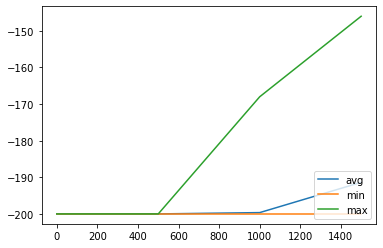

In [ ]:
env = gym.make('MountainCar-v0')

LEARNNIG_RATE = 0.1
DISCOUNT = 0.95
EPISODES = 2000

SHOW_EVERY = 500

DISCRETE_OS_SIZE = [20] * len(env.observation_space.high)
discrete_os_win_size = (env.observation_space.high - env.observation_space.low)/DISCRETE_OS_SIZE


epsilon = 0.5
START_EPSILON_DECAYING = 1
END_EPSILON_DECAYING = EPISODES // 2
epsilon_decay_value = epsilon/(END_EPSILON_DECAYING - START_EPSILON_DECAYING)

q_table = np.random.uniform(low=-2, high=0, size=(DISCRETE_OS_SIZE + [env.action_space.n]))

ep_reward = []
aggr_ep_rewards = {'ep': [], 'avg': [], 'min': [], 'max':[]}


def get_discrete_state(state):
  discrete_state = (state - env.observation_space.low)/discrete_os_win_size
  return tuple(discrete_state.astype(np.int))


for episode in range(EPISODES):
  episode_reward = 0
  if episode % SHOW_EVERY == 0:
    print(episode)
    render = True 
  else:
    render = False
  
  discrete_state = get_discrete_state(env.reset())
  done = False 
  while not done:

    if np.random.random() > epsilon:
      action = np.argmax(q_table[discrete_state])
    else:
      action = np.random.randint(0, env.action_space.n)

    new_state, reward, done,_ = env.step(action)
    episode_reward += reward
    new_discrete_state = get_discrete_state(new_state)
    #if render:
    #  env.render()
    if not done:
      max_future_q = np.max(q_table[new_discrete_state])
      current_q = q_table[discrete_state + (action, )]
      new_q = (1-LEARNNIG_RATE)*current_q + LEARNNIG_RATE*(reward + DISCOUNT*max_future_q)
      q_table[discrete_state + (action,)] = new_q
    elif new_state[0] >= env.goal_position:
      print(f'we made it on episode {episode}')
      q_table[discrete_state + (action, )] = 0

    discrete_state = new_discrete_state

  if END_EPSILON_DECAYING >= episode >= START_EPSILON_DECAYING:
    epsilon -= epsilon_decay_value

  ep_reward.append(episode_reward)

  if not episode % SHOW_EVERY:
    average_reward = sum(ep_reward[-SHOW_EVERY:])/len(ep_reward[-SHOW_EVERY:])
    aggr_ep_rewards['ep'].append(episode)
    aggr_ep_rewards['avg'].append(average_reward)
    aggr_ep_rewards['min'].append(min(ep_reward[-SHOW_EVERY:]))
    aggr_ep_rewards['max'].append(max(ep_reward[-SHOW_EVERY:]))

    print(f'episode: {episode} avg: {average_reward} min: {min(ep_reward[-SHOW_EVERY:])} max: {max(ep_reward[-SHOW_EVERY:])}')
  
env.close()

plt.plot(aggr_ep_rewards['ep'], aggr_ep_rewards['avg'], label='avg')
plt.plot(aggr_ep_rewards['ep'], aggr_ep_rewards['min'], label='min')
plt.plot(aggr_ep_rewards['ep'], aggr_ep_rewards['max'], label='max')
plt.legend(loc=4)
plt.show()

